<a href="https://colab.research.google.com/github/oussemamoussa98/NLP_Projet/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk scikit-learn pandas


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
import pickle
import nltk

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive
drive.mount('/content/drive')

# List all files in MyDrive to confirm paths
print("Files in the root of Google Drive:")
print(os.listdir('/content/drive/MyDrive/'))

# Set the correct path to dataset
df = pd.read_csv('/content/drive/MyDrive/NLP_dataset/train.csv')

# Load the data
try:
    data = pd.read_csv(df)
    print("Dataset loaded successfully!")
    print(data.head())
except Exception as e:
    print("Error loading the dataset. Ensure the file exists or check the file path.")
    print(e)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in the root of Google Drive:
['Classroom', 'oussema web', 'Colab Notebooks', 'tp', 'tpG1', 'cv web', 'Login', 'compte rendu reseau avancé Tp 5.pdf', 'oussemamoussaTP05.gdoc', 'compte rendu reseau avancé Tp 5.gdoc', 'TP6.pkt', 'oussemamoussa-3GI-CCNA1-S1-202-certificate.pdf', 'oussemamoussa-3GI-CCNA1-S1-202-letter.pdf', 'codeigniter.rar', 'ci4.sql', 'travel agency', 'MERN_Project', 'Avis de rattrapage-Projet-Sem.pdf', 'Mini Projet IA', 'SpringBoot', 'NLP_dataset']
Error loading the dataset. Ensure the file exists or check the file path.
argument of type 'method' is not iterable


In [ ]:
# Check basic information about the dataset
print(df.describe())
print(df.info())
print(df.isnull().sum())

# Fill missing values with empty strings
df = df.fillna('')
print(df.isnull().sum())

# Drop unnecessary columns
df = df.drop(['id', 'title', 'author'], axis=1)
df.head()


              label
count  20800.000000
mean       0.500625
std        0.500012
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20800 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB
None
text     0
label    0
dtype: int64
text     0
label    0
dtype: int64


KeyError: "['id', 'title', 'author'] not found in axis"

In [ ]:
# Initialize the Porter Stemmer
port_stem = PorterStemmer()

# Define the stemming function
def stemming(content):
    con = re.sub('[^a-zA-Z]', ' ', content)  # Remove special characters
    con = con.lower()
    con = con.split()
    con = [port_stem.stem(word) for word in con if not word in stopwords.words('english')]
    con = ' '.join(con)
    return con

# Apply stemming to the 'text' column
df['text'] = df['text'].apply(stemming)
df.head()


In [ ]:
# Features (X) and Labels (y)
X = df['text']
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Vectorize the text data
vect = TfidfVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)


In [ ]:
# Train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Check accuracy
print("Model Accuracy:", model.score(X_test, y_test))


Model Accuracy: 0.8802884615384615


In [ ]:
# Save the vectorizer and model
pickle.dump(vect, open('vector.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))

print("Vectorizer and model saved!")


Vectorizer and model saved!


Training Accuracy: 0.9999399038461538
Test Accuracy: 0.8802884615384615
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2132
           1       0.87      0.89      0.88      2028

    accuracy                           0.88      4160
   macro avg       0.88      0.88      0.88      4160
weighted avg       0.88      0.88      0.88      4160



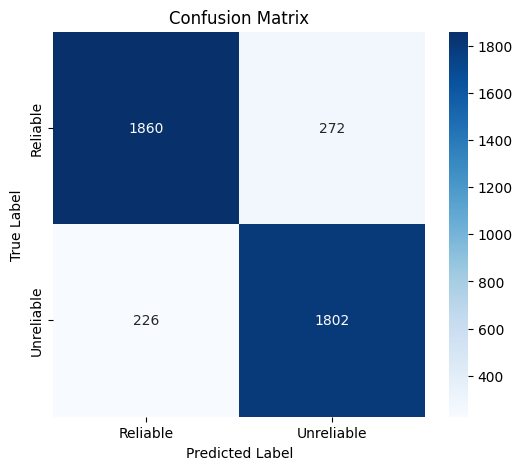

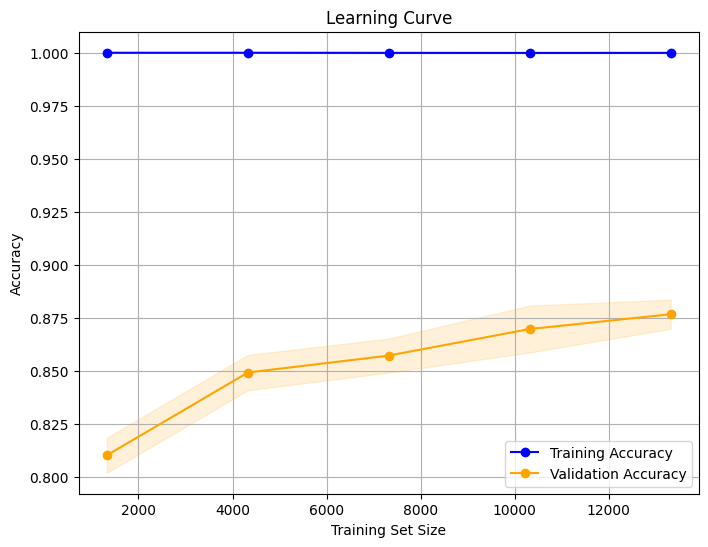

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the training data
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Evaluate the model on the test data
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Generate a classification report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Reliable', 'Unreliable'], yticklabels=['Reliable', 'Unreliable'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate learning curve
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
# Reload the vectorizer and model
vector_form = pickle.load(open('vector.pkl', 'rb'))
load_model = pickle.load(open('model.pkl', 'rb'))

# Define a prediction function
def fake_news(news):
    news = stemming(news)
    input_data = [news]
    vector_form1 = vector_form.transform(input_data)
    prediction = load_model.predict(vector_form1)
    return prediction

# Test with a sample input
sample_news = """In these trying times, Jackie Mason is the n this week’s exclusive clip for Breitbart News...]"""
result = fake_news(sample_news)

if result == [0]:
    print('Reliable')
else:
    print('Unreliable')


Reliable


In [ ]:
from google.colab import files
files.download('vector.pkl')
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install streamlit
!pip install pyngrok
!pip install nltk scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Load resources
port_stem = PorterStemmer()
vector_form = pickle.load(open('vector.pkl', 'rb'))
load_model = pickle.load(open('model.pkl', 'rb'))

# Define helper functions
def stemming(content):
    con = re.sub('[^a-zA-Z]', ' ', content)
    con = con.lower()
    con = con.split()
    con = [port_stem.stem(word) for word in con if not word in stopwords.words('english')]
    con = ' '.join(con)
    return con

def fake_news(news):
    news = stemming(news)
    input_data = [news]
    vector_form1 = vector_form.transform(input_data)
    prediction = load_model.predict(vector_form1)
    return prediction

# Streamlit UI
if __name__ == '__main__':
    st.title('Fake News Classification App')
    st.subheader("Input the News Content Below")
    sentence = st.text_area("Enter your news content here", "", height=200)
    predict_btt = st.button("Predict")
    if predict_btt:
        prediction_class = fake_news(sentence)
        if prediction_class == [0]:
            st.success('Reliable')
        if prediction_class == [1]:
            st.warning('Unreliable')


In [ ]:
!ngrok config add-authtoken 2pwkGAGHpB18zZBBGi7Y9fIB30K_73dPLctzuAEhPbd651iuz


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Run Streamlit in the background
!streamlit run app.py &>/dev/null&

# Expose the app using Ngrok
public_url = ngrok.connect(addr=8501)
print(f"Streamlit App is running at {public_url}")


Streamlit App is running at NgrokTunnel: "https://ce95-35-197-127-141.ngrok-free.app" -> "http://localhost:8501"
